In [1]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [2]:
x1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
y1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA 8 Cluster Number 1901-2010.csv",index_col=0)
x2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
y2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA 8 Cluster Number 2011-2022.csv",index_col=0)

In [3]:
x=pd.concat([x1,x2])
x=x.set_index(i for i in range(122))
y=pd.concat([y1,y2])
y=y.set_index(i for i in range(122))


In [10]:
x_test

region1  region2  region3  region4  region5  region6  region7  region8  \
18         1        4        4        5        4        4        3        2   
45         2        3        6        4        4        3        4        4   
47         2        2        3        2        4        4        2        3   
89         5        6        6        7        5        5        6        4   
4          1        2        1        2        7        6        5        2   
40         4        5        7        4        7        7        6        4   
62         6        2        4        4        4        4        4        3   
107        7        6        4        4        4        2        2        7   
31         1        1        2        2        6        4        4        4   
55         2        2        2        4        3        2        2        4   
53         2        4        4        2        2        3        4        5   
119        7        7        7        7        6        6        6        7   
10         1        1        1        3        2        2        2        2   

     region9  region10  region11  region12  region13  
18         4         3         5         4         4  
45         2         4         7         6         6  
47         4         4         2         3         4  
89         6         5         6         6         7  
4          2         2         1         1         1  
40         2         5         7         6         7  
62         6         6         1         4         4  
107        6         4         2         4         4  
31         2         4         1         3         2  
55         6         4         4         2         2  
53         4         4         5         3         4  
119        6         6         7         7         7  
10         2         2         2         1         1

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [5]:
from sklearn import svm
model = svm.SVC(random_state=42)
model.fit(x_train,y_train)

C:\Users\ratho\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [9]:
y_pred = model.predict(x_test)
y_pred+1

array([2, 2, 4, 3, 4, 7, 6, 5, 4, 1, 5, 3, 8], dtype=int64)

In [7]:
y_array=y_test.values.ravel()
y_array

array([1, 1, 3, 2, 3, 6, 5, 4, 3, 0, 4, 2, 7], dtype=int64)

In [8]:
accuracy_score(y_pred,y_array)

1.0

In [10]:
clusters=[]
for i in range(1,9):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\SSTA 8 Clusters Images\SSTA 8 Clusters Indian Rainfall Images with CBAR\SSTA 8 Clusters {i} INDIAN RAINFALL.png"))
    

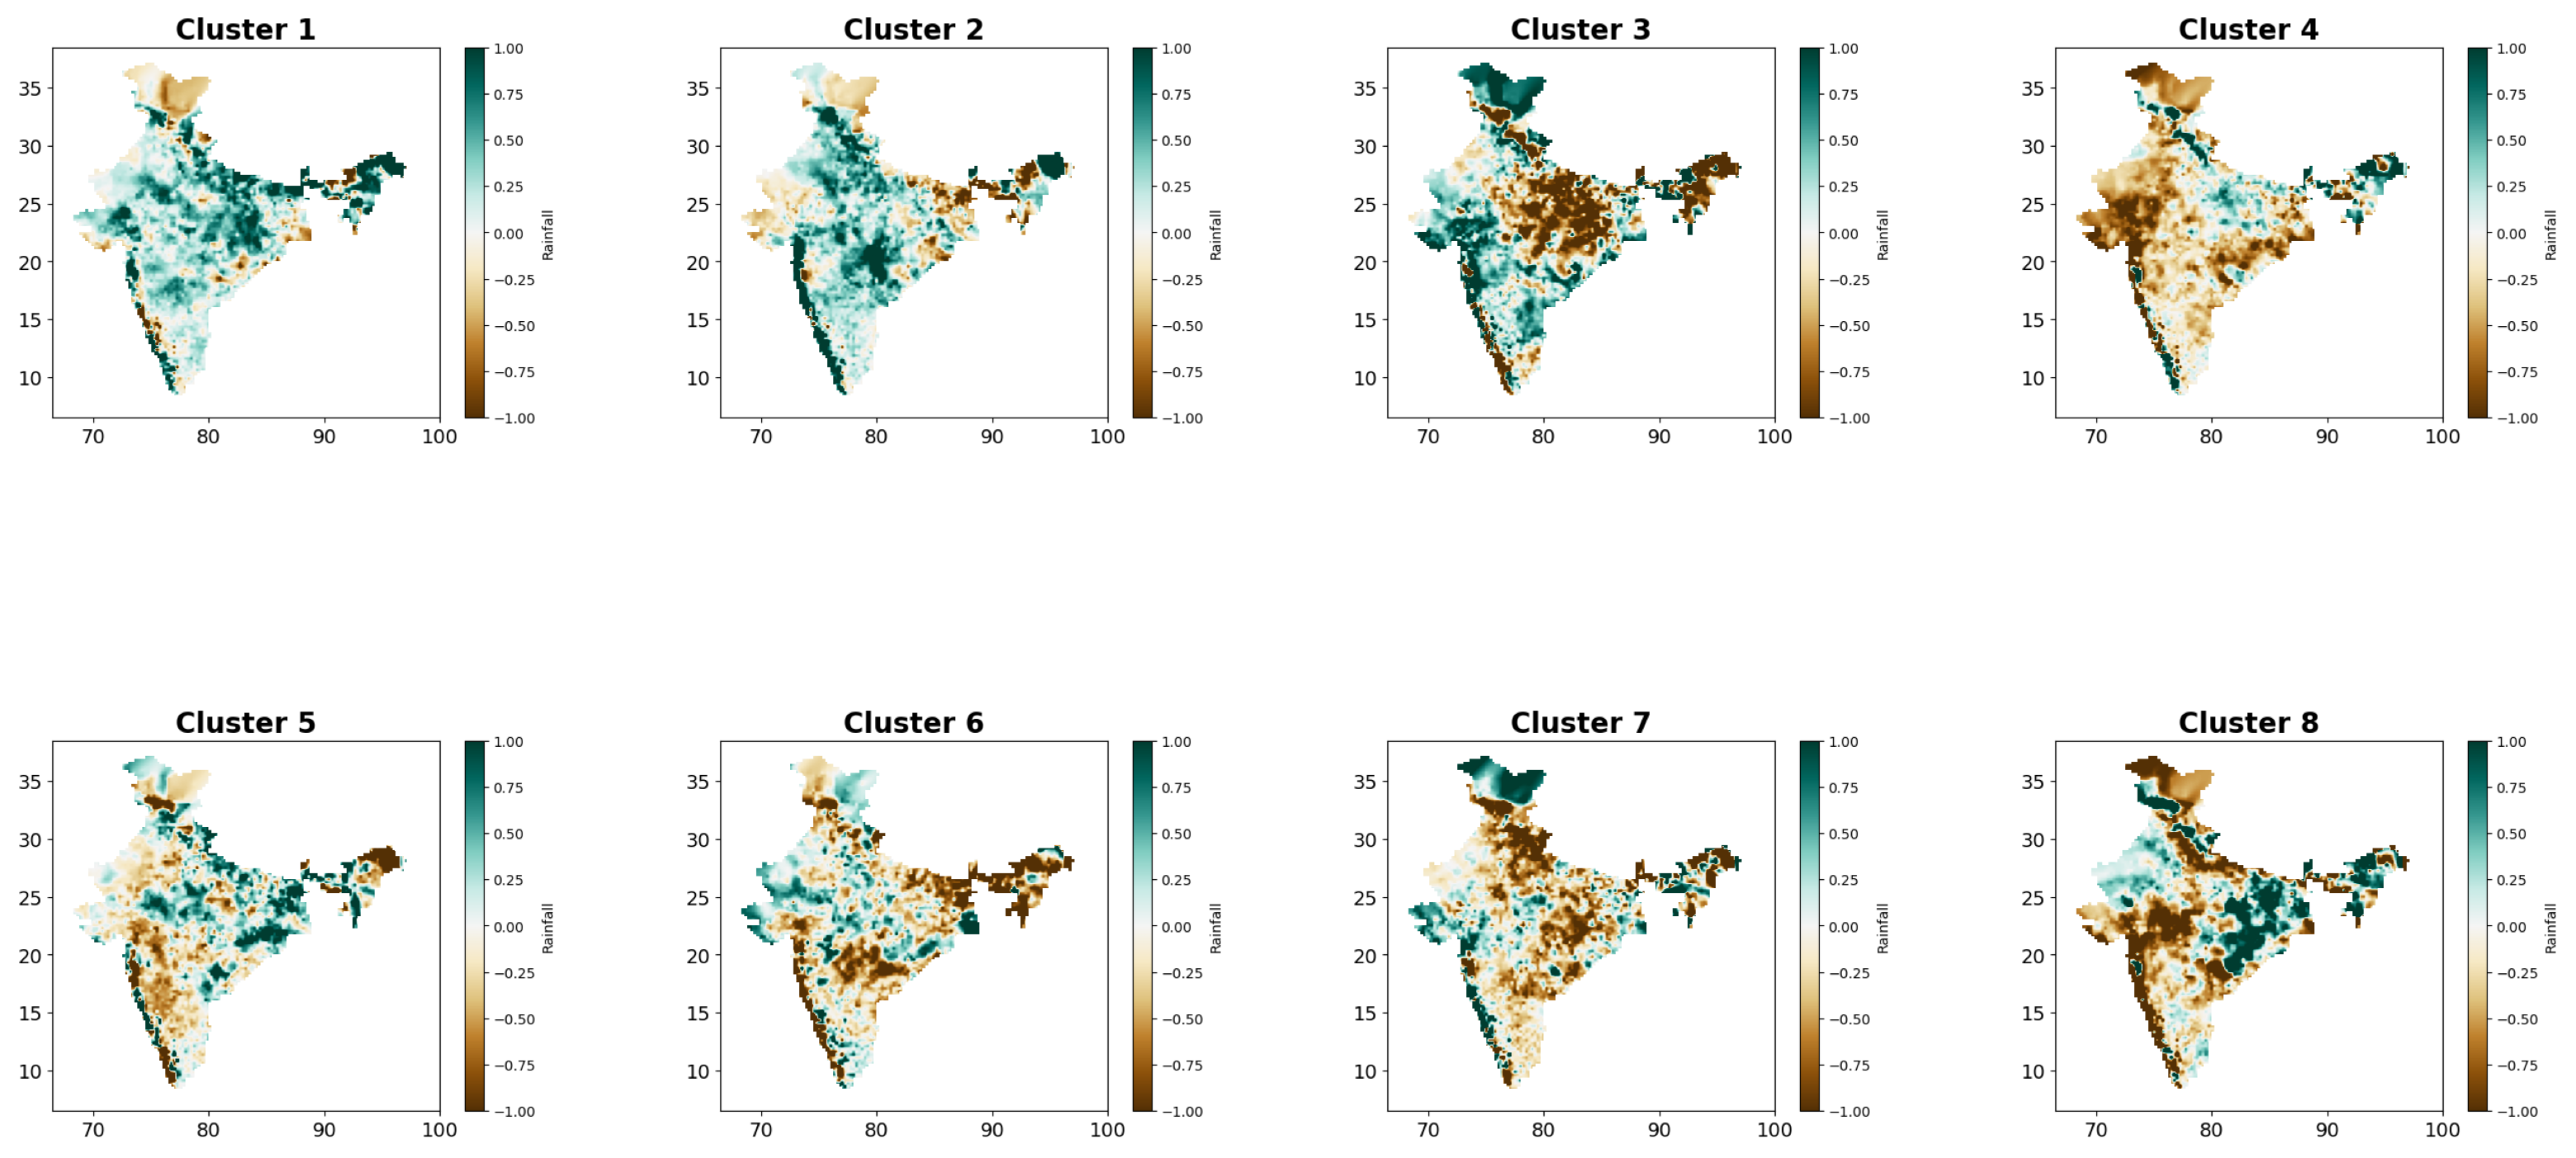

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(40, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off')

In [12]:
indexes_list = y_test.index.tolist()
indexes_list

[18, 45, 47, 89, 4, 40, 62, 107, 31, 55, 53, 119, 10]

In [13]:
actual_years_map=[]
for i in indexes_list:
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\Rainfall Anomaly Images with CBAR\\{i+1901} Rainfall.png"))
                        

In [14]:
print("Predicted Cluster",y_pred)
print("Actual Cluster",y_array)

Predicted Cluster [1 1 3 2 3 6 5 4 3 0 4 2 7]
Actual Cluster [1 1 3 2 3 6 5 4 3 0 4 2 7]


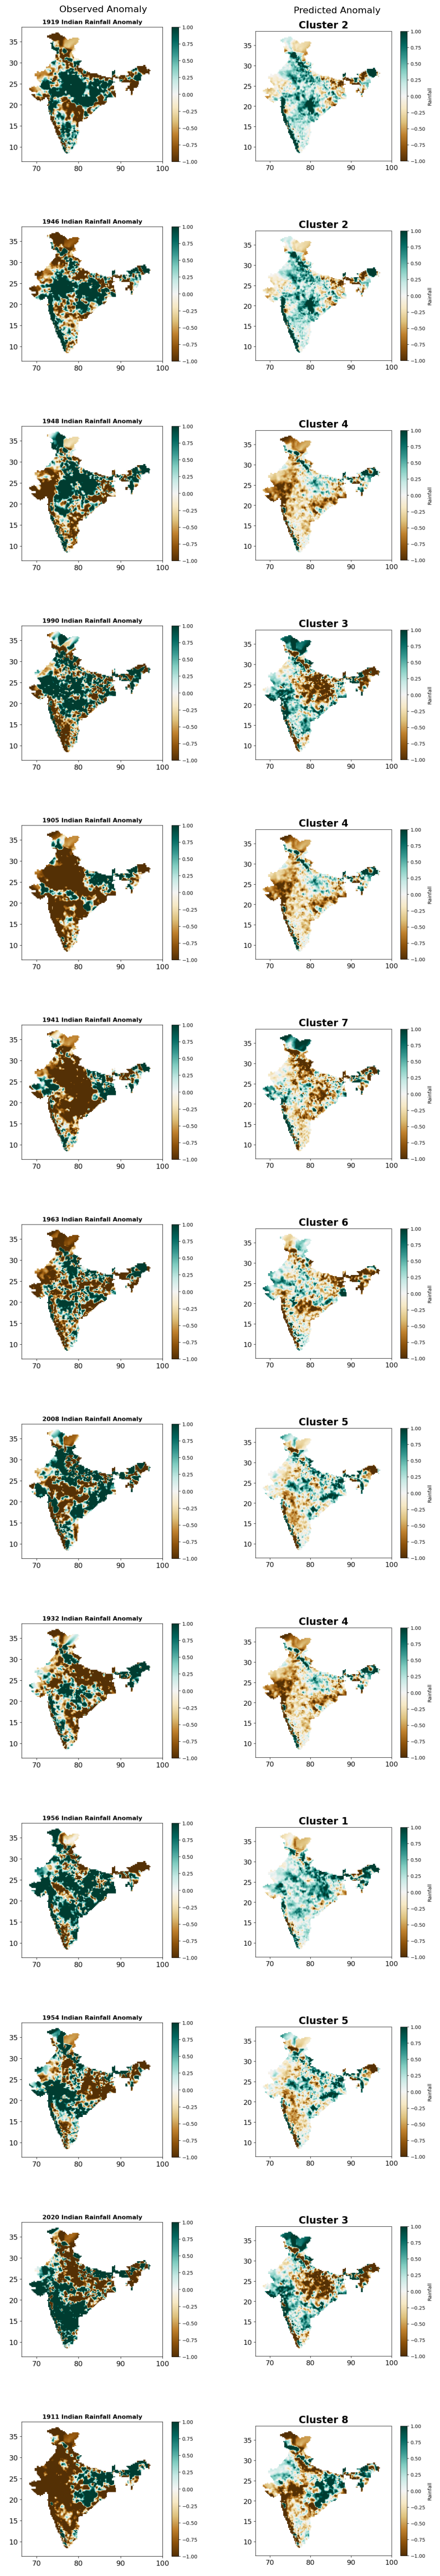

In [15]:
fig, axes = plt.subplots(13, 2, figsize=(10, 60)) 
j=0
fl=0

for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        if(fl==1):
            ax.set_title(f'Predicted Anomaly')
            fl=2
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        if(fl==0):
            ax.set_title('Observed Anomaly')
            fl=1
        
# plt.savefig('SSTA 8 Clusters Random Forest Train Test Split Prediction.png')


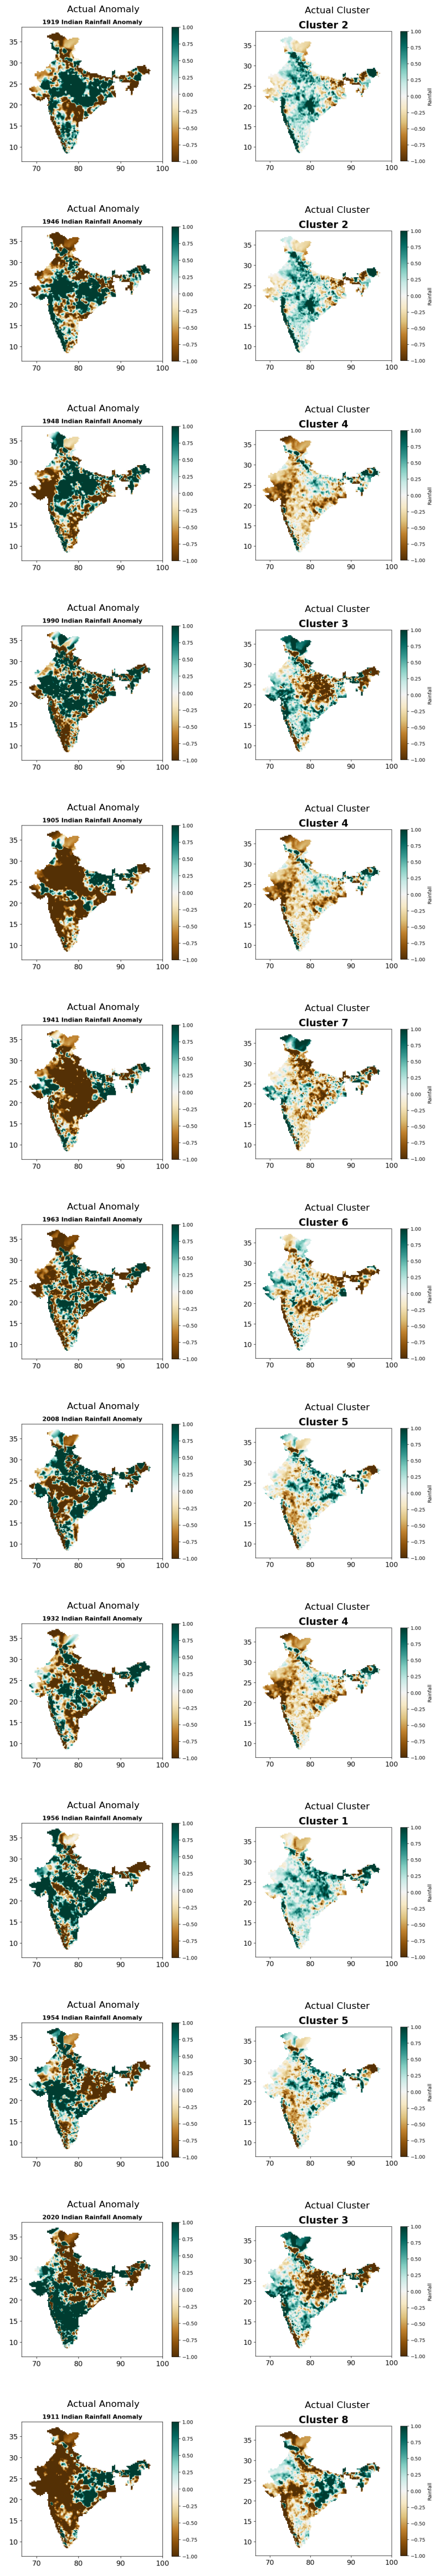

In [16]:
#Actual Years
fig, axes = plt.subplots(13, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

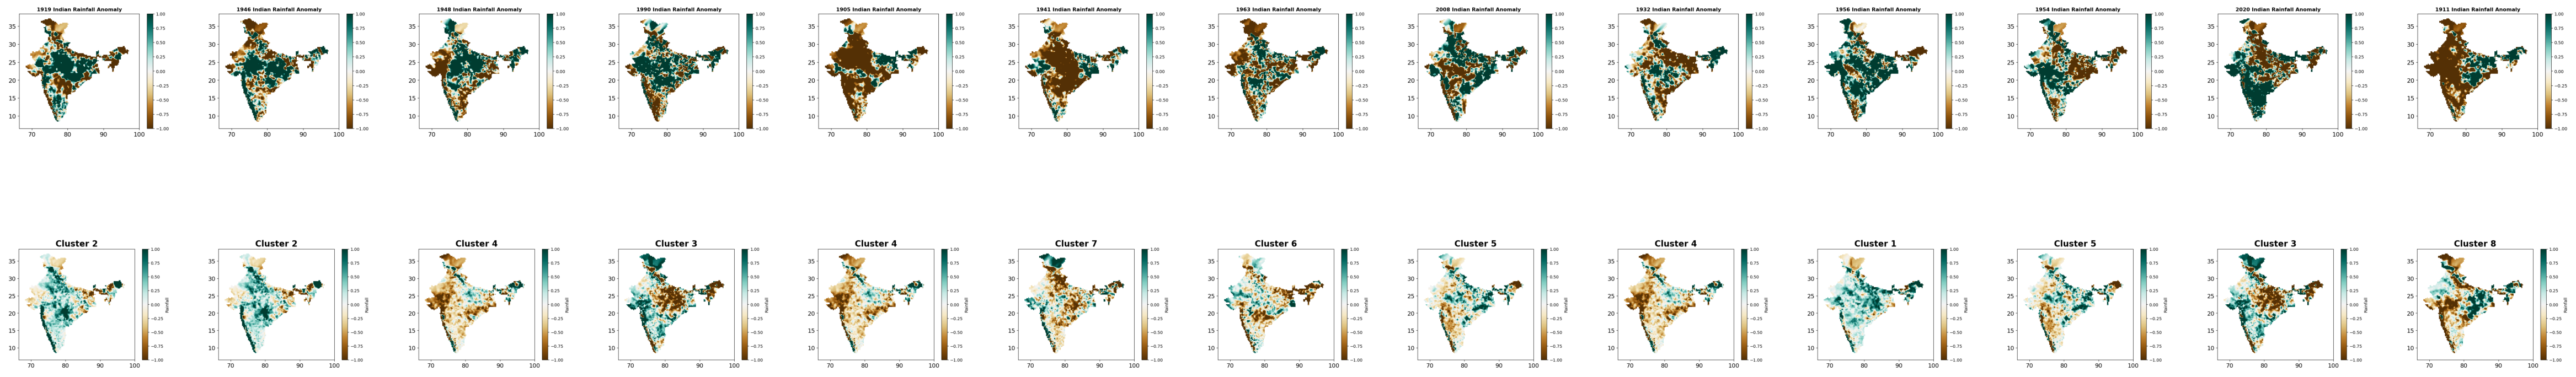

In [17]:
fig, axes = plt.subplots(2, 13, figsize=(60, 10)) 
j=0
k=0
l=0
for i, ax in enumerate(axes.ravel()):
    
   
    if(i>=0 and i<13):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
#         ax.set_title('Observed Anomaly')
        j+=1
        
    elif(i>=13 and i<26):
        pred_clus=y_pred[k]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
#         ax.set_title(f'Predicted Anomaly')
        k+=1
#     elif(i>=26):
#         pred_clus=y_array[l]
#         ax.imshow(clusters[pred_clus])
#         ax.axis('off')
#         ax.set_title(f'Actual Cluster')
#         l+=1
        
#     print(i,j,k,l)
#
# plt.savefig('SSTA 8 Clusters Random Forest Train Test Split Prediction.png')

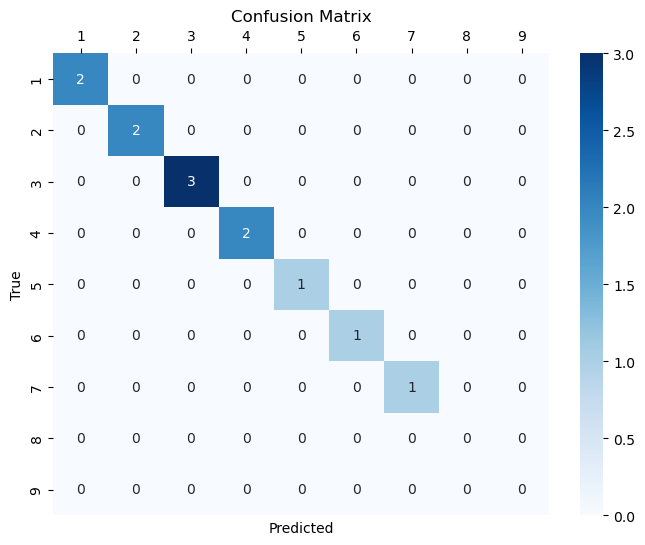

In [18]:
# Create a confusion matrix
cm = confusion_matrix(y_pred, y_array,labels=range(1,10))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 10), yticklabels=range(1, 10))
plt.gca().xaxis.set_ticks_position('top')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [19]:
# Calculate the F1 score
f1 = f1_score(y_array, y_pred, average='macro')
precision = precision_score(y_array, y_pred, average='macro')
recall = recall_score(y_array, y_pred, average='macro')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 1.0
Precision: 1.0
Recall: 1.0
